In [26]:
from interpret.provider import InlineProvider
from interpret import set_visualize_provider
from interpret import show
from sklearn.metrics import accuracy_score, f1_score
from preprocess import DataPreprocess
import warnings

warnings.filterwarnings('ignore')
set_visualize_provider(InlineProvider())

seed = 42
data_loader = DataPreprocess(seed)

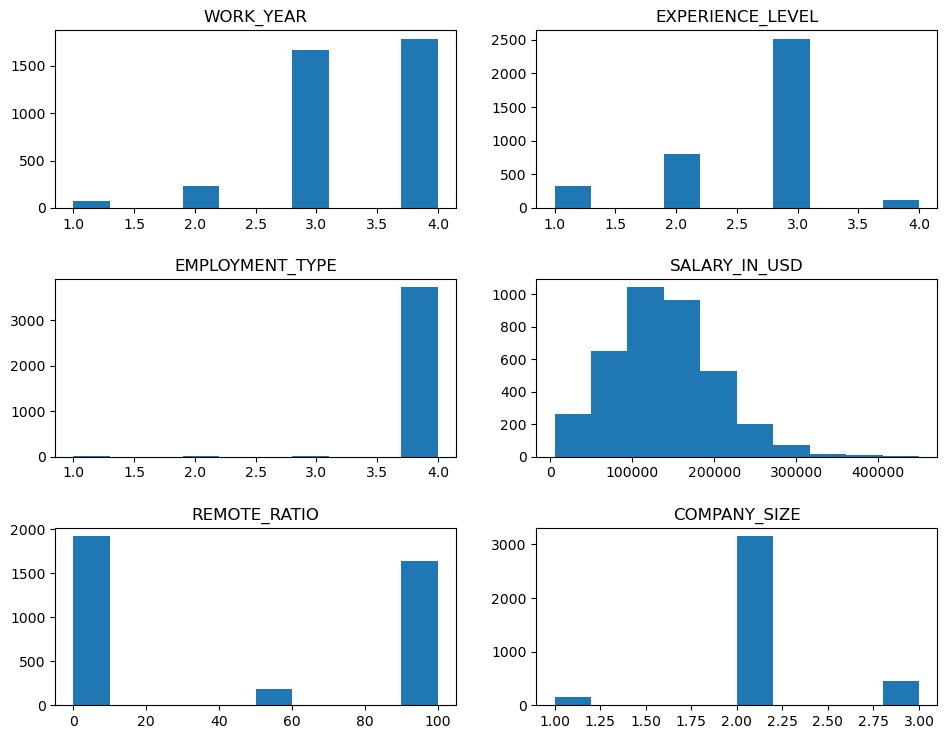

,work_year,experience_level,employment_type,salary_in_usd,remote_ratio,company_size
2709,3,3,4,63000,100,2
242,4,3,4,122900,0,3
3116,3,3,4,99450,100,2
1363,4,3,4,126000,0,2
343,4,3,4,147000,0,2


In [27]:
data = data_loader.load_data()
data = data_loader.encode_categorical_data(data)
# data = data_loader.normalize_data(data) # Skipping this for future interpretation
data_loader.plot_hist(data)
data.sample(n=5)

In [28]:
from interpret.glassbox import ExplainableBoostingRegressor


X_train, X_test, y_train, y_test = data_loader.get_data_split(data)

ebm = ExplainableBoostingRegressor(
    interactions=0, 
    validation_size=0, outer_bags=1, min_samples_leaf=1)
ebm.fit(X_train, y_train)
show(ebm.explain_global())


In [29]:
from interpret.glassbox import ExplainableBoostingClassifier



X_train, X_test, y_train, y_test = data_loader.get_data_split_for_classification(data.copy())
X_over, y_over = data_loader.oversample(X_train, y_train)

ebm = ExplainableBoostingClassifier(feature_names=X_train.columns)
ebm.fit(X_train, y_train)
y_pred = ebm.predict(X_test)
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("F1 Score: ", f1_score(y_test, y_pred, average='macro'))
data.sample(n=5)
show(ebm.explain_local(X_test[:25], y_test[:25], name="Explainable Boosting Classifier - Local Explanation (first 25)"))
show(ebm.explain_global(name="Explainable Boosting Classifier - Global Explanation"))

(3004, 5) (3004,)
Accuracy:  0.8535286284953395
F1 Score:  0.46936022610483047


In [30]:
from interpret.glassbox import ClassificationTree



X_train, X_test, y_train, y_test = data_loader.get_data_split_for_classification(data.copy())
X_over, y_over = data_loader.oversample(X_train, y_train)

tree = ClassificationTree(feature_names=X_train.columns)
tree.fit(X_train, y_train)
y_pred = tree.predict(X_test)
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("F1 Score: ", f1_score(y_test, y_pred, average='macro'))
data.sample(n=5)
show(tree.explain_local(X_test[:25], y_test[:25], name="Decision Tree - Local Explanation (first 25)"))
show(tree.explain_global(name="Decision Tree - Global Explanation"))

(3004, 5) (3004,)
Accuracy:  0.8521970705725699
F1 Score:  0.47737688473715556
